<a href="https://colab.research.google.com/github/JoseM2004/Proyecto_Modelos_2/blob/main/02_Modelo_Regresion_logistica_class_sin_norm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión logística

Aplicamos un modelo de regresión logística para predecir si una mascota es adoptada o no

Importes necesarios

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
  precision_score, recall_score,
  roc_auc_score, accuracy_score,
  confusion_matrix, ConfusionMatrixDisplay,
  roc_curve
)

Leemos los datos. Recuerda tener el archivo 'data.csv' cargado en tu entorno de trabajo.


Distribución de la variable objetivo (AdoptionLikelihood):
AdoptionLikelihood
0    0.671649
1    0.328351
Name: proportion, dtype: float64


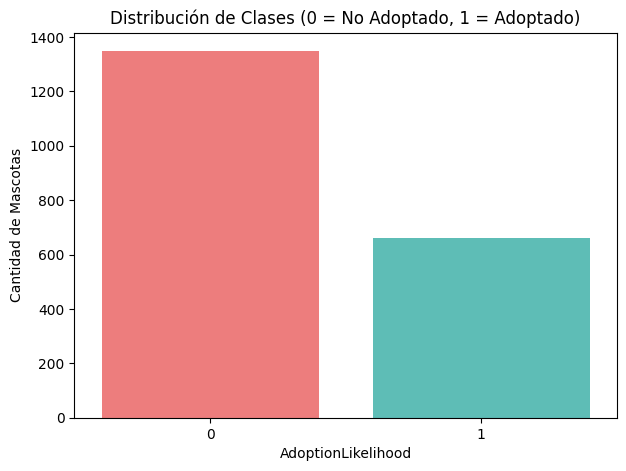

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
data = pd.read_csv('data_cleaner.csv')

print("\nDistribución de la variable objetivo (AdoptionLikelihood):")
print(data['AdoptionLikelihood'].value_counts(normalize=True))
data['AdoptionLikelihood'] = data['AdoptionLikelihood'].astype(str)
palette = {"0": "#FF6B6B", "1": "#4ECDC4"}

plt.figure(figsize=(7, 5))
sns.countplot(
    data=data,
    x='AdoptionLikelihood',
    hue='AdoptionLikelihood',
    palette=palette,
    legend=False
)

plt.title('Distribución de Clases (0 = No Adoptado, 1 = Adoptado)')
plt.ylabel('Cantidad de Mascotas')
plt.xlabel('AdoptionLikelihood')
plt.show()



Partimos los datos en X e Y y dividimos estos datos en train y test.

In [13]:
X = data.drop(columns=['AdoptionLikelihood'])
y = data['AdoptionLikelihood'].astype(int)

X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Tamaño del conjunto de entrenamiento: {X_train_final.shape}")
print(f"Tamaño del conjunto de prueba: {X_test_final.shape}")

Tamaño del conjunto de entrenamiento: (1605, 19)
Tamaño del conjunto de prueba: (402, 19)


Inicializamos el modelo

In [14]:
modelo = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

Se crea la función regresion_lineal_multiple la cual recibe el x e y, y el número de folds con el que hará validación cruzada.

Fold 1 -> Precision: 0.514, Recall: 0.686, ROC AUC: 0.799
Fold 2 -> Precision: 0.506, Recall: 0.743, ROC AUC: 0.802
Fold 3 -> Precision: 0.521, Recall: 0.695, ROC AUC: 0.803
Fold 4 -> Precision: 0.535, Recall: 0.783, ROC AUC: 0.818
Fold 5 -> Precision: 0.567, Recall: 0.717, ROC AUC: 0.831

=== Promedios de Cross-Validation ===
Precisión promedio: 0.529 ± 0.021
Recall promedio:    0.725 ± 0.035
ROC AUC promedio:   0.811 ± 0.012


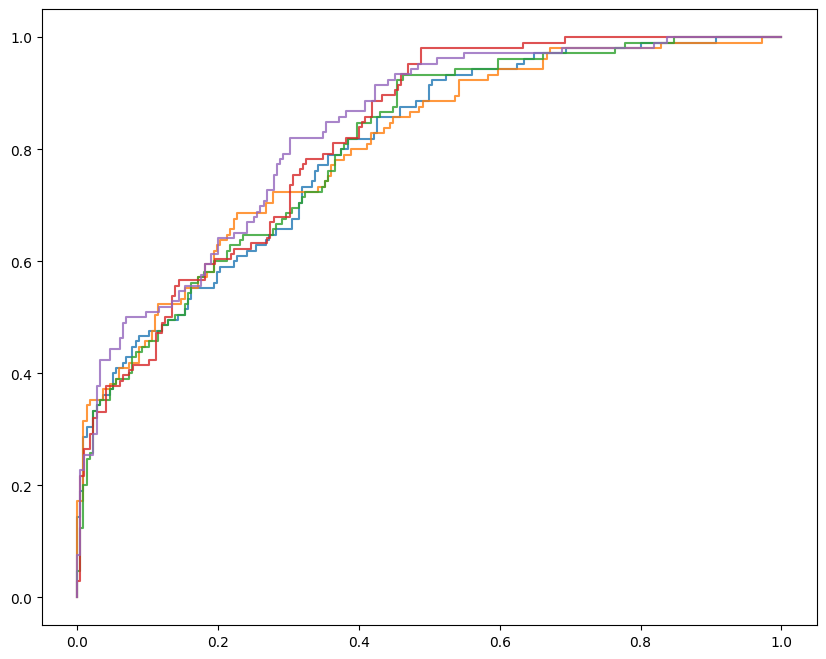

In [15]:
precision_scores = []
recall_scores = []
roc_auc_scores = []

plt.figure(figsize=(10, 8))

for fold, (train_idx, valid_idx) in enumerate(skf.split(X_train_final, y_train_final), 1):
    X_train, X_valid = X_train_final.iloc[train_idx], X_train_final.iloc[valid_idx]
    y_train, y_valid = y_train_final.iloc[train_idx], y_train_final.iloc[valid_idx]

    modelo.fit(X_train, y_train)

    # Predicciones
    y_pred = modelo.predict(X_valid)
    y_proba = modelo.predict_proba(X_valid)[:, 1]

    # Métricas
    precision = precision_score(y_valid, y_pred)
    recall = recall_score(y_valid, y_pred)
    roc_auc = roc_auc_score(y_valid, y_proba)

    precision_scores.append(precision)
    recall_scores.append(recall)
    roc_auc_scores.append(roc_auc)

    print(f"Fold {fold} -> Precision: {precision:.3f}, Recall: {recall:.3f}, ROC AUC: {roc_auc:.3f}")

    # Curva ROC por fold
    fpr, tpr, _ = roc_curve(y_valid, y_proba)
    plt.plot(fpr, tpr, alpha=0.8, label=f'Fold {fold} (AUC = {roc_auc:.2f})')
print("\n" + "="*35)
print("=== Promedios de Cross-Validation ===")
print(f"Precisión promedio: {np.mean(precision_scores):.3f} ± {np.std(precision_scores):.3f}")
print(f"Recall promedio:    {np.mean(recall_scores):.3f} ± {np.std(recall_scores):.3f}")
print(f"ROC AUC promedio:   {np.mean(roc_auc_scores):.3f} ± {np.std(roc_auc_scores):.3f}")
print("="*35)

In [16]:
# Evaluación en conjunto de entrenamiento (para comparar con val/test y detectar overfitting)
y_train_pred = modelo.predict(X_train)
y_train_proba = modelo.predict_proba(X_train)[:, 1]  # Probabilidades para AUC

# Métricas en train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_proba)

print("=== Métricas en Entrenamiento (Train) ===")
print(f"Accuracy (train):  {train_accuracy:.3f}")
print(f"Precision (train): {train_precision:.3f}")
print(f"Recall (train):    {train_recall:.3f}")
print(f"ROC AUC (train):   {train_auc:.3f}")

=== Métricas en Entrenamiento (Train) ===
Accuracy (train):  0.712
Precision (train): 0.543
Recall (train):    0.758
ROC AUC (train):   0.821



=== Métricas en el Conjunto de Prueba Final ===
Accuracy:  0.672
Precisión: 0.500
Recall:    0.720
ROC AUC:   0.786

Matriz de Confusión - Conjunto de Prueba:


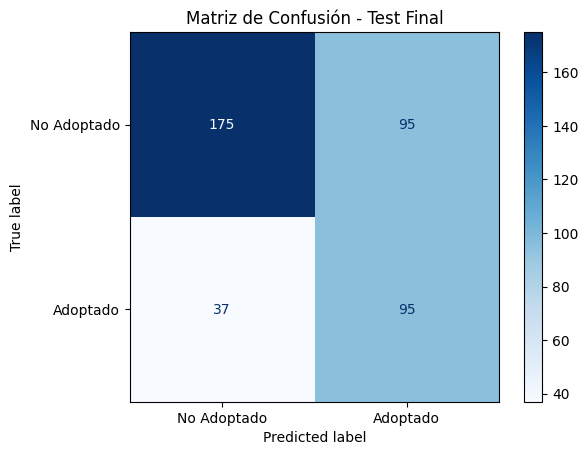

In [17]:
modelo.fit(X_train_final, y_train_final)
y_pred_final = modelo.predict(X_test_final)
y_proba_final = modelo.predict_proba(X_test_final)[:, 1]

print("\n=== Métricas en el Conjunto de Prueba Final ===")
print(f"Accuracy:  {accuracy_score(y_test_final, y_pred_final):.3f}")
print(f"Precisión: {precision_score(y_test_final, y_pred_final):.3f}")
print(f"Recall:    {recall_score(y_test_final, y_pred_final):.3f}")
print(f"ROC AUC:   {roc_auc_score(y_test_final, y_proba_final):.3f}")

print("\nMatriz de Confusión - Conjunto de Prueba:")
cm = confusion_matrix(y_test_final, y_pred_final)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Adoptado', 'Adoptado'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Matriz de Confusión - Test Final")
plt.show()

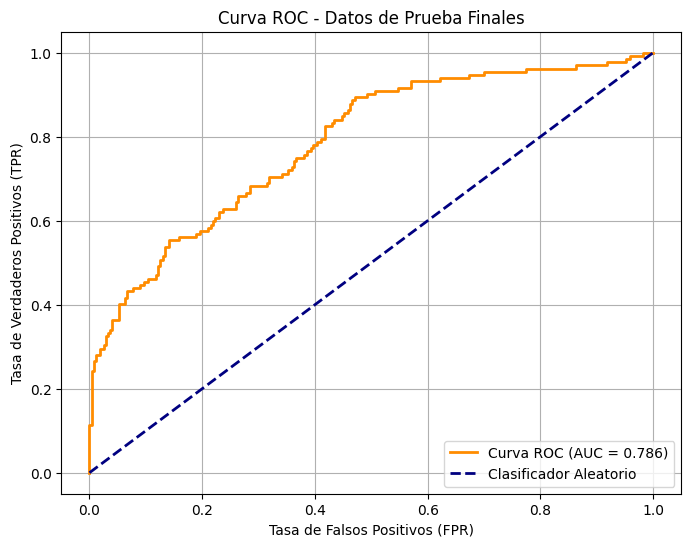

In [18]:
fpr, tpr, thresholds = roc_curve(y_test_final, y_proba_final)
roc_auc_final = roc_auc_score(y_test_final, y_proba_final)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc_final:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Clasificador Aleatorio')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Datos de Prueba Finales')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()